## Importando as bibliotecas necessárias

In [2]:
#Importing the libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import NearestNeighbors
import plotly.express as px
from scipy.sparse import csr_matrix


## Importação de dados 


In [3]:
#Importing the dataset
path = 'data/BX-Books.csv'
path2 = 'data/BX-Book-Ratings.csv'
path3 = 'data/BX-Users.csv'

books = pd.read_csv(path,
                     sep = ';',
                       encoding= 'latin-1',
                         on_bad_lines = 'skip')

ratings = pd.read_csv(path2, 
                      sep = ';', 
                      encoding= 'latin-1',
                      on_bad_lines = 'skip')

users = pd.read_csv(path3,
                    sep = ';',
                    encoding = 'latin-1',
                    on_bad_lines = 'skip')

C:\Users\Suporte\AppData\Local\Temp\ipykernel_21592\3037909872.py:5: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  books = pd.read_csv(path,


In [4]:
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [5]:
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [6]:
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


## Analise da base books

In [7]:
books['Book-Title'].value_counts()

Book-Title
Selected Poems                                                                                                                    27
Little Women                                                                                                                      24
Wuthering Heights                                                                                                                 21
The Secret Garden                                                                                                                 20
Dracula                                                                                                                           20
                                                                                                                                  ..
What Every Kid Should Know                                                                                                         1
The Seventh Enemy (A Brady Coyne Mystery)                 

In [8]:
top_books = ratings['ISBN'].value_counts()
top_books.head(10)

ISBN
0971880107    2502
0316666343    1295
0385504209     883
0060928336     732
0312195516     723
044023722X     647
0679781587     639
0142001740     615
067976402X     614
0671027360     586
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='ISBN'>

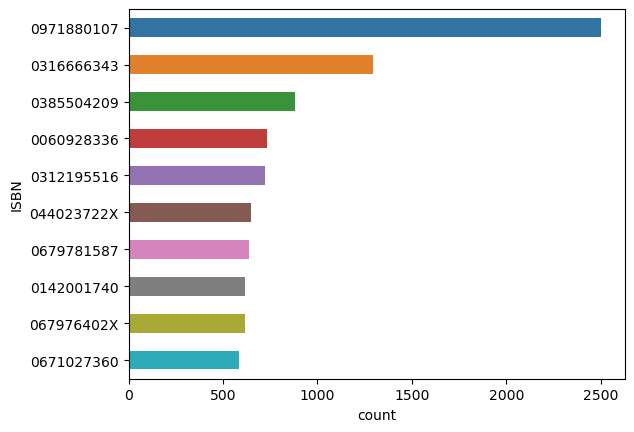

In [9]:
grafico = sns.countplot(y = 'ISBN', data = ratings, order = ratings['ISBN'].value_counts().index[:10], width= 0.5)
grafico

In [10]:
most_autors = books['Book-Author'].value_counts()
most_autors.head(10)

Book-Author
Agatha Christie        632
William Shakespeare    567
Stephen King           524
Ann M. Martin          423
Carolyn Keene          373
Francine Pascal        372
Isaac Asimov           330
Nora Roberts           315
Barbara Cartland       307
Charles Dickens        302
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='Book-Author'>

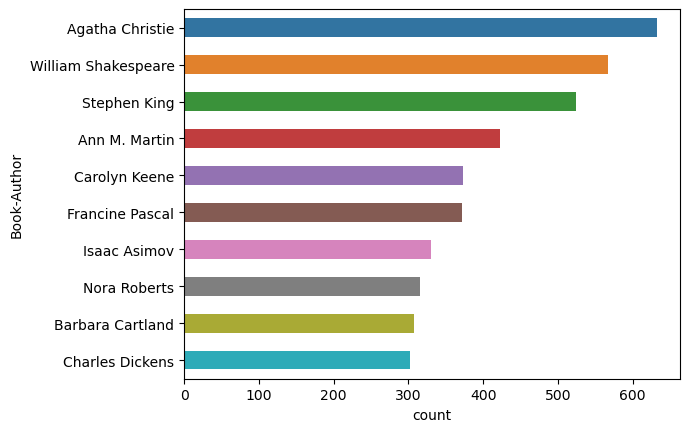

In [11]:
grafico = sns.countplot(y = 'Book-Author', data = books, order = books['Book-Author'].value_counts().index[:10], width= 0.5)
grafico

## Analise base ratings

In [12]:
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [13]:
ratings['ISBN'].value_counts()


ISBN
0971880107     2502
0316666343     1295
0385504209      883
0060928336      732
0312195516      723
               ... 
1568656386        1
1568656408        1
1569551553        1
1570081808        1
05162443314       1
Name: count, Length: 340556, dtype: int64

In [14]:
top_users= ratings['User-ID'].value_counts().head(10)
top_users

User-ID
11676     13602
198711     7550
153662     6109
98391      5891
35859      5850
212898     4785
278418     4533
76352      3367
110973     3100
235105     3067
Name: count, dtype: int64

## Analise base Users

<Axes: xlabel='age', ylabel='count'>

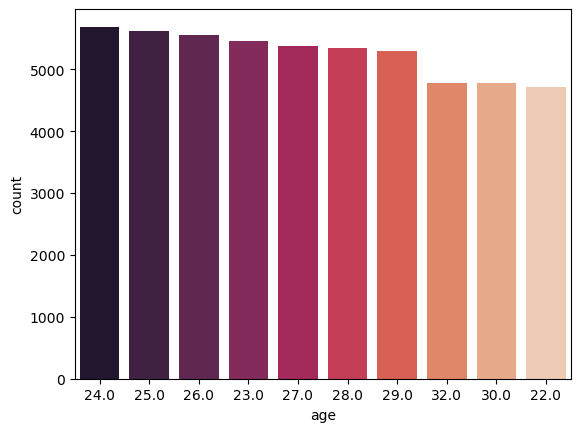

In [43]:
sns.countplot(x = 'age', data = users, order = users['age'].value_counts().index[:10], palette= 'rocket')

<Axes: xlabel='User-ID'>

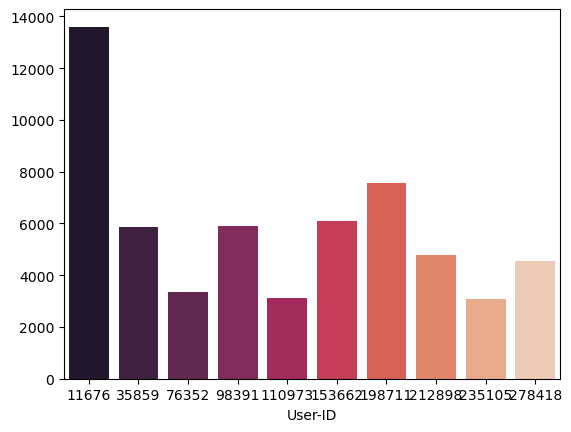

In [44]:
sns.barplot(x = top_users.index, y = top_users.values, palette = 'rocket')

## Tratamento de Dados

In [16]:
books.head()


,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [17]:
#Renaming columns to make it easier to work with them 
books.rename(columns= {'Book-Title': 'title', 'Book-Author': 'author', 'Year-Of-Publication': 'year', 'Publisher': 'publisher'}, inplace= True)
users.rename(columns = {'User-ID': 'user_id', 'Location': 'location', 'Age': 'age'}, inplace = True)
ratings.rename(columns = {'User-ID': 'user_id', 'Book-Rating': 'rating'}, inplace = True)

In [18]:
books.head()

,ISBN,title,author,year,publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [19]:
users.head()

,user_id,location,age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [20]:
ratings.head()

,user_id,ISBN,rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [21]:
#Creating a variable to store only users with more than 200 reviews
x = ratings['user_id'].value_counts() > 200
x

user_id
11676      True
198711     True
153662     True
98391      True
35859      True
          ...  
116180    False
116166    False
116154    False
116137    False
276723    False
Name: count, Length: 105283, dtype: bool

In [46]:
#Creating a variable to store the index of the users with more than 200 reviews
y = x[x].index
print(y.shape)

(899,)


In [23]:
y.to_list()

[11676,
 198711,
 153662,
 98391,
 35859,
 212898,
 278418,
 76352,
 110973,
 235105,
 230522,
 16795,
 234623,
 36836,
 52584,
 245963,
 204864,
 55492,
 185233,
 171118,
 102967,
 232131,
 227447,
 98741,
 129358,
 60244,
 190925,
 135149,
 231210,
 189835,
 189334,
 69697,
 78783,
 177458,
 172742,
 73394,
 242824,
 269566,
 213350,
 23768,
 238781,
 175003,
 226545,
 36606,
 182085,
 11601,
 148744,
 123981,
 26544,
 43246,
 200674,
 23902,
 274308,
 257204,
 95359,
 166123,
 127233,
 127429,
 162639,
 275970,
 87141,
 172030,
 12538,
 184299,
 238120,
 130474,
 76626,
 236283,
 115120,
 266226,
 93047,
 142524,
 87555,
 254465,
 245827,
 166596,
 196077,
 51883,
 35050,
 265115,
 56959,
 110029,
 228998,
 31315,
 246655,
 271284,
 225087,
 131402,
 56447,
 175886,
 88733,
 40943,
 174304,
 56399,
 251613,
 234828,
 16634,
 158295,
 52614,
 31556,
 156150,
 248718,
 225810,
 35857,
 63714,
 107784,
 167800,
 114414,
 147847,
 274061,
 76499,
 113519,
 182987,
 7346,
 100906,
 22434

In [48]:
#creating a new variable to store only the users with more than 200 reviews
ratings = ratings[ratings['user_id'].isin(y)]

In [25]:
#Merging the datasets to make it easier to work with them
rating_with_books = ratings.merge(books, on = 'ISBN')
rating_with_books.head()

,user_id,ISBN,rating,title,author,year,publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...
1,3363,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...
2,11676,002542730X,6,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...
3,12538,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...
4,13552,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...


In [26]:
#Creating a new variable to store the average rating of each book
number_rating = rating_with_books.groupby('title')['rating'].count().reset_index()
number_rating.head()

,title,rating
0,A Light in the Storm: The Civil War Diary of ...,2
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,Beyond IBM: Leadership Marketing and Finance ...,1
4,Clifford Visita El Hospital (Clifford El Gran...,1


In [27]:
#Renaming the columns to make it easier to work with them
number_rating.rename(columns = {'rating': 'number_of_ratings'}, inplace = True)
number_rating.head()

,title,number_of_ratings
0,A Light in the Storm: The Civil War Diary of ...,2
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,Beyond IBM: Leadership Marketing and Finance ...,1
4,Clifford Visita El Hospital (Clifford El Gran...,1


In [50]:
#Merging the datasets 
final_rating = rating_with_books.merge(number_rating, on = 'title')
final_rating

,user_id,ISBN,rating,title,author,year,publisher,Image-URL-S,Image-URL-M,Image-URL-L,number_of_ratings
0,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...,82
1,3363,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...,82
2,11676,002542730X,6,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...,82
3,12538,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...,82
4,13552,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...,82
...,...,...,...,...,...,...,...,...,...,...,...
487666,275970,1892145022,0,Here Is New York,E. B. White,1999,Little Bookroom,http://images.amazon.com/images/P/1892145022.0...,http://images.amazon.com/images/P/1892145022.0...,http://images.amazon.com/images/P/1892145022.0...,1
487667,275970,1931868123,0,There's a Porcupine in My Outhouse: Misadventu...,Mike Tougias,2002,Capital Books (VA),http://images.amazon.com/images/P/1931868123.0...,http://images.amazon.com/images/P/1931868123.0...,http://images.amazon.com/images/P/1931868123.0...,1
487668,275970,3411086211,10,Die Biene.,Sybil GrÃ?Â¤fin SchÃ?Â¶nfeldt,1993,"Bibliographisches Institut, Mannheim",http://images.amazon.com/images/P/3411086211.0...,http://images.amazon.com/images/P/3411086211.0...,http://images.amazon.com/images/P/3411086211.0...,1
487669,275970,3829021860,0,The Penis Book,Joseph Cohen,1999,Konemann,http://images.amazon.com/images/P/3829021860.0...,http://images.amazon.com/images/P/3829021860.0...,http://images.amazon.com/images/P/3829021860.0...,1


In [29]:
#Creating a new variable to store only the books with more than 50 reviews
final_rating = final_rating[final_rating['number_of_ratings'] >= 50]
final_rating.shape

(61853, 11)

In [30]:
#Droping the duplicates
final_rating.drop_duplicates(['user_id', 'title'], inplace = True)
final_rating.shape

(59850, 11)

In [31]:
#Pivoting the dataset to make it possible to work with it
book_pivot = final_rating.pivot_table(columns = 'user_id', index = 'title', values = 'rating')
book_pivot

user_id,254,2276,2766,2977,3363,3757,4017,4385,6242,6251,...,274004,274061,274301,274308,274808,275970,277427,277478,277639,278418
title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
1st to Die: A Novel,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2nd Chance,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN
4 Blondes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
84 Charing Cross Road,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,10.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Year of Wonders,NaN,NaN,NaN,7.0,NaN,NaN,NaN,NaN,7.0,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
You Belong To Me,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN


In [32]:
#Filling the NaN values with 0
book_pivot.fillna(0, inplace = True)
book_pivot.shape

(742, 888)

## Criação e treinamento de modelo preditivo

In [33]:
#Creating a new variable to store the sparse matrix
book_sparse = csr_matrix(book_pivot)

In [34]:
#Creating a new variable to store the model
model = NearestNeighbors(algorithm= 'brute')
#Fitting the model
model.fit(book_sparse)

NearestNeighbors(algorithm='brute')

## Teste do modelo preditivo

In [35]:
#Creating a variable to store results
distances, suggestions = model.kneighbors(book_pivot.iloc[237, :].values.reshape(1, -1))

In [36]:
#Creating a loop to print the results
for i in range(len(suggestions)):
    print(book_pivot.index[suggestions[i]])

Index(['Harry Potter and the Chamber of Secrets (Book 2)',
       'Harry Potter and the Prisoner of Azkaban (Book 3)',
       'Harry Potter and the Goblet of Fire (Book 4)',
       'Harry Potter and the Sorcerer's Stone (Book 1)', 'Exclusive'],
      dtype='object', name='title')


In [51]:
distances, suggestions = model.kneighbors(book_pivot.iloc[0, :].values.reshape(1, -1))

for i in range(len(suggestions)):
    print(book_pivot.index[suggestions[i]])

Index(['1984', 'No Safe Place', 'A Civil Action', 'Foucault's Pendulum',
       'Long After Midnight'],
      dtype='object', name='title')


In [52]:
distances, suggestions = model.kneighbors(book_pivot.iloc[1, :].values.reshape(1, -1))

for i in range(len(suggestions)):
    print(book_pivot.index[suggestions[i]])

Index(['1st to Die: A Novel', 'Exclusive', 'The Cradle Will Fall',
       'The Clinic (Alex Delaware Novels (Paperback))', 'No Safe Place'],
      dtype='object', name='title')


In [53]:
distances, suggestions = model.kneighbors(book_pivot.iloc[2, :].values.reshape(1, -1))

for i in range(len(suggestions)):
    print(book_pivot.index[suggestions[i]])

Index(['2nd Chance', 'The Next Accident', 'Exclusive', 'The Ghost',
       'Unspeakable'],
      dtype='object', name='title')
